#Importation des  Librairies

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

# Lecture et préparation des données

## Lire les données

Nous allons importer le fichier csv "train.csv" et le stocker sous une data frame appellée *dataset_house*.


In [ ]:
dataset_house=pd.read_csv("train.csv")


Affichons ci-dessous la dimension et un subest de notre tableau de données

In [ ]:
print("Dimension des données (nombre d'échantillons, nombre de variables)")
print(dataset_house.shape)
print("Un subset du tableau :")
dataset_house.head()

Dimension des données (nombre d'échantillons, nombre de variables)
(1460, 81)
Un subset du tableau :


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Préparation des données

Nous allons à présent procéder à un préprocessing des données. Cette étape est importante et inclut:

*   Le nettoyage des données
*   La supression des variables inutiles
*   L'identification des variables catégorielles et continues
*   Le traitement des données manquantes
*   La selection des variables explicatives qui seront gardées dans la modélisation.





Identifions maintenant les variables catégorielles (qualitatives) et continues (quantitatives)

In [ ]:
for colname, serie in dataset_house.iteritems():
    print(colname + " has " + str(serie.drop_duplicates().shape[0]) + " unique values.")

Id has 1460 unique values.
MSSubClass has 15 unique values.
MSZoning has 5 unique values.
LotFrontage has 111 unique values.
LotArea has 1073 unique values.
Street has 2 unique values.
Alley has 3 unique values.
LotShape has 4 unique values.
LandContour has 4 unique values.
Utilities has 2 unique values.
LotConfig has 5 unique values.
LandSlope has 3 unique values.
Neighborhood has 25 unique values.
Condition1 has 9 unique values.
Condition2 has 8 unique values.
BldgType has 5 unique values.
HouseStyle has 8 unique values.
OverallQual has 10 unique values.
OverallCond has 9 unique values.
YearBuilt has 112 unique values.
YearRemodAdd has 61 unique values.
RoofStyle has 6 unique values.
RoofMatl has 8 unique values.
Exterior1st has 15 unique values.
Exterior2nd has 16 unique values.
MasVnrType has 5 unique values.
MasVnrArea has 328 unique values.
ExterQual has 4 unique values.
ExterCond has 5 unique values.
Foundation has 6 unique values.
BsmtQual has 5 unique values.
BsmtCond has 5 un

Il semblerait que la plupart des variables  soit catégorielles. 
En effet les variables qui ont peu de valeurs uniques sont souvent des variables catégorielles. Il convient tout de même de vérifier si c'est bien le cas.
Ainsi par exmepel, *CentralAir* qui a que deux variables uniques est une variable catégorielle. C'est logique car cette variable indique si le logement en question dispose de la climatisation centrale. Elle prend 2 valeurs soit "oui" soit "non".

En suivant ce raisonnement, nous avons établi une liste des varaibles catégorielles et une liste des variables numériques ( ou continues)


In [ ]:
Categorical=["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","Functional","FireplaceQu","GarageType","GarageQual",'GarageFinish',"GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"]

Numerical=["LotFrontage","LotArea","MasVnrArea","BsmtUnfSF","BsmtFinSF1","BsmtFinSF2","TotalBsmtSF",	"1stFlrSF",	"2ndFlrSF","LowQualFinSF","GrLivArea","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

#les dates sont traitées à part
Date=["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]

Ensuite, nous convertissons les dates en format *date* en utilisant la fonction *to_datetime* de Pandas.

In [ ]:
for date in ["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold"]:
  dataset_house[date]=pd.to_datetime(dataset_house[date], format='%Y')

In [ ]:
dataset_house["MoSold"]=pd.to_datetime(dataset_house["MoSold"], format='%M')

Une fois les variables catégorielles définies, nous les transformons en type *Category* en utilisant la fonction *Categorical* de Pandas

In [ ]:
for cat in Categorical:
  dataset_house[cat]=pd.Categorical(dataset_house[cat], ordered=False)

In [ ]:
pd.set_option('display.max_rows', 500)
dataset_house.dtypes

Id                        int64
MSSubClass             category
MSZoning               category
LotFrontage             float64
LotArea                   int64
Street                 category
Alley                  category
LotShape               category
LandContour            category
Utilities              category
LotConfig              category
LandSlope              category
Neighborhood           category
Condition1             category
Condition2             category
BldgType               category
HouseStyle             category
OverallQual            category
OverallCond            category
YearBuilt        datetime64[ns]
YearRemodAdd     datetime64[ns]
RoofStyle              category
RoofMatl               category
Exterior1st            category
Exterior2nd            category
MasVnrType             category
MasVnrArea              float64
ExterQual              category
ExterCond              category
Foundation             category
BsmtQual               category
BsmtCond

Une étape importante dans la préparation des données concerne la gestion des valeurs manquantes. 

Notre stratégie consiste à imputer les données manques par leurs moyennes quand il s'agit d'une variable numérique. 

Pour les variables catégorielles, l'imputation se fait par la valeur qui se repète le plus.

Enfin, certaines variables contiennents un pourcentage de valeurs manquantes trop elevé (supérieur à 90% des fois), nous avons déider de les supprimer.


In [ ]:
# pourcentage des valeurs manquantes par variable
100*dataset_house.isnull().sum()/dataset_house.shape[0]

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [ ]:
#supression des variables contenant un pourcentage de valeurs manquans trop elevé
dataset_house = dataset_house.drop(["PoolQC","Fence",'MiscFeature','FireplaceQu',"Alley",],axis=1)

In [ ]:
#imputation par la moyenne
dataset_house.LotFrontage = dataset_house.LotFrontage.fillna(int(dataset_house["LotFrontage"].mean()))
dataset_house.MasVnrArea = dataset_house.MasVnrArea.fillna(int(dataset_house["LotFrontage"].mean()))

In [ ]:
#imputation des variables catégorielles
columns = ["MasVnrType","GarageCond","GarageQual","GarageType","Electrical","BsmtFinType2","BsmtFinType1","BsmtExposure","BsmtCond","BsmtQual",'GarageFinish']
for col in columns:
  dataset_house[col]=dataset_house[col].fillna(value=dataset_house[col].value_counts().index[0])

In [ ]:
#on vérifie bien qu'il ne reste plus aucune valeur manquante dans notre dataset
dataset_house.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [ ]:
#statistiques du dataset
dataset_house.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.041096,10516.828082,103.500685,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,22.024031,9981.264932,180.586245,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,70.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


Ci-dessous, nous allons essayer de repérer les variables les plus correllées entre elles

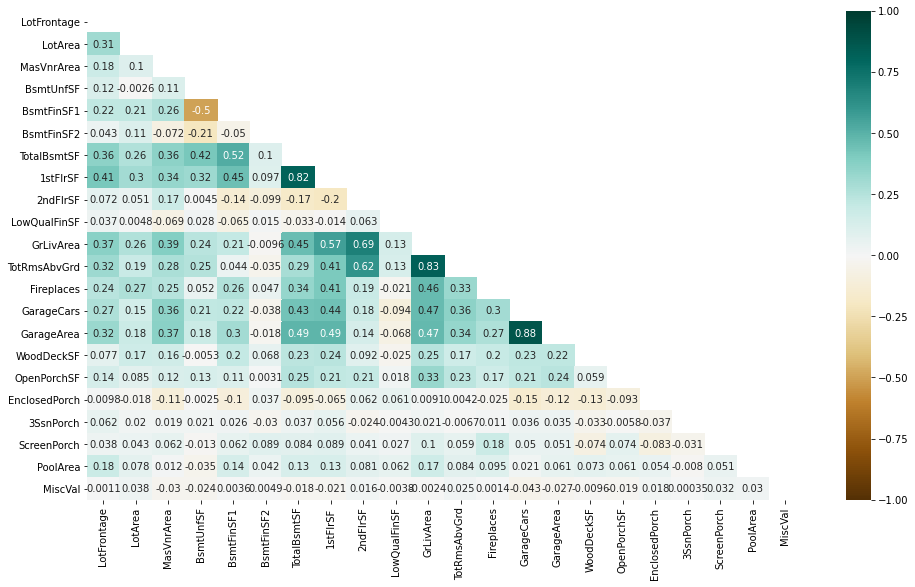

In [ ]:
#carte  de chaleur montrant la corrélation entre les variables
plt.figure(figsize=(16, 9))
mask = np.triu(np.ones_like(dataset_house[Numerical].corr(), dtype=np.bool))
heatmap=sns.heatmap(dataset_house[Numerical].corr(), vmin=-1, vmax=1,annot=True, cmap='BrBG',mask=mask)

Représentons graphiquement les 3 variables ayant le plus de corrélation

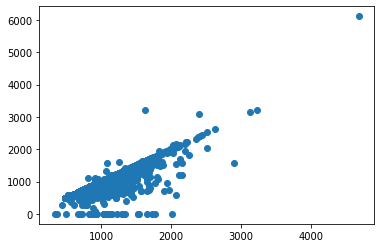

In [ ]:
#plot des variables  "1stFlrSF" et "TotalBsmtSF"
plt.scatter(x="1stFlrSF", y="TotalBsmtSF",data=dataset_house)


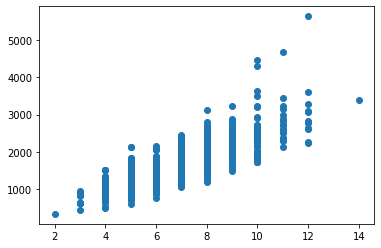

In [ ]:
#plot des variables "TotRmsAbvGrd" et "GrLivArea"
plt.scatter(x="TotRmsAbvGrd", y="GrLivArea",data=dataset_house)

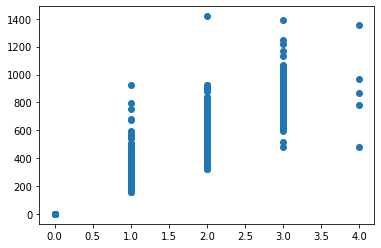

In [ ]:
#plot des variables "GarageCars" et "GarageArea"
plt.scatter(x="GarageCars", y="GarageArea",data=dataset_house)

In [ ]:
#Nous supprimons les variables les plus corrélées avec des variables existant dèjà
#dans le dataset, pour éviter d'avoir une information redondante
dataset_house=dataset_house.drop(["TotalBsmtSF","TotRmsAbvGrd","GarageCars"],axis=1)

En représentant les histogrammes, nous remarquons que beaucoup de variables n'apportent pas uen information siginificative.
Nous allons supprmier les variables dont la distribution montre que'elles ne bougent pas ou qui sont tout le temps trop proches d'une certaien valeur comme par exemple la variable *MiscVal*

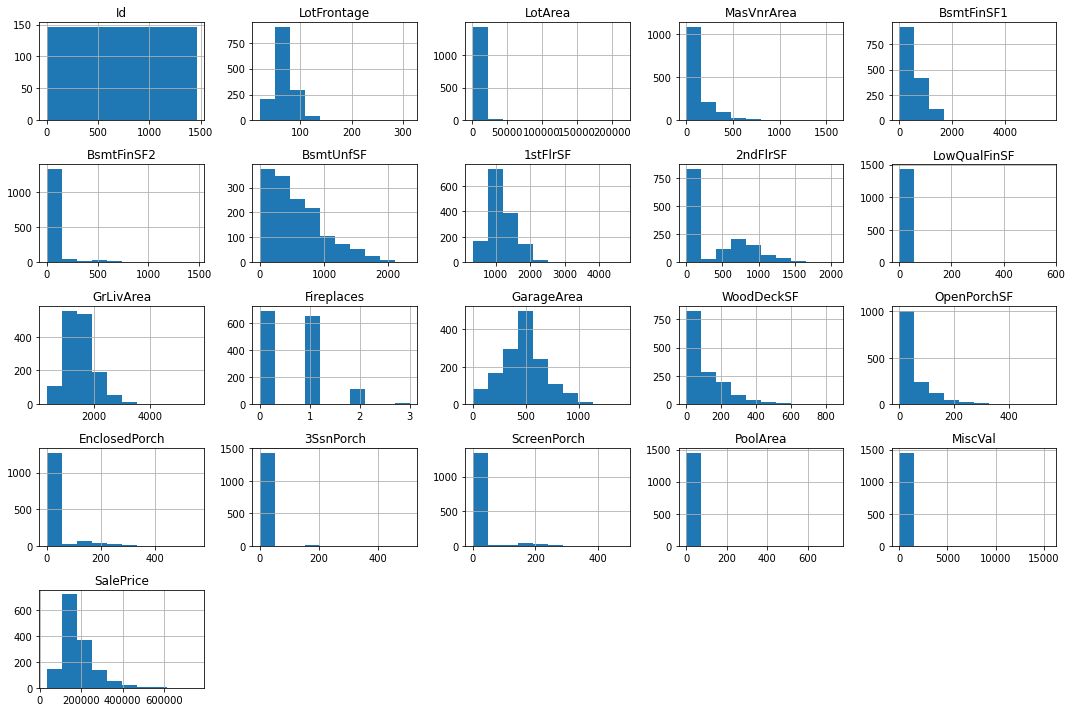

In [ ]:
dataset_house.hist(figsize = (15,10))
plt.tight_layout()
plt.show()


In [ ]:
todrop=["MiscVal","3SsnPorch","ScreenPorch","PoolArea","EnclosedPorch","BsmtHalfBath","BsmtFinSF2","LotArea","LowQualFinSF","KitchenAbvGr",'Id']
dataset_house=dataset_house.drop(columns=todrop,axis=1)

In [ ]:
dataset_house.shape

(1460, 62)

##Dummification des variables catégorielles

Puisque nous allons utiliser Scikit LEarn pour effecteuer uen partier de nos modélisations, il convient de transofrmer les variables catégorielles en variables *dummies*.

Cela se fait par la fonction *get_dummies* de Pandas.

In [ ]:
categorical_features = dataset_house.columns[dataset_house.dtypes == "category"].tolist()
print(categorical_features)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
dataset_house_dummies = pd.get_dummies(dataset_house[categorical_features])
dataset_house_dummies.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
dataset_house = pd.concat([dataset_house.drop(categorical_features, axis=1), dataset_house_dummies], axis=1)
dataset_house.head()

,LotFrontage,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,2003-01-01,2003-01-01,196.0,706,150,856,854,1710,0,2003-01-01,548,0,61,1900-01-01 00:02:00,2008-01-01,208500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,1976-01-01,1976-01-01,0.0,978,284,1262,0,1262,1,1976-01-01,460,298,0,1900-01-01 00:05:00,2007-01-01,181500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,68.0,2001-01-01,2002-01-01,162.0,486,434,920,866,1786,1,2001-01-01,608,0,42,1900-01-01 00:09:00,2008-01-01,223500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60.0,1915-01-01,1970-01-01,0.0,216,540,961,756,1717,1,1998-01-01,642,0,35,1900-01-01 00:02:00,2006-01-01,140000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,84.0,2000-01-01,2000-01-01,350.0,655,490,1145,1053,2198,1,2000-01-01,836,192,84,1900-01-01 00:12:00,2008-01-01,250000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Nous formattons correctement les colonnes qui ne contient que années  avec *dt.year*
dataset_house["YearBuilt"]=dataset_house["YearBuilt"].dt.year
dataset_house["YearRemodAdd"]=dataset_house["YearRemodAdd"].dt.year
dataset_house["GarageYrBlt"]=dataset_house["GarageYrBlt"].dt.year
dataset_house["YrSold"]=dataset_house["YrSold"].dt.year

#ces des varaibles de type date ne sont pas utilies, nous les supprimons
dataset_house=dataset_house.drop("MoSold",axis=1)
dataset_house=dataset_house.drop("GarageYrBlt",axis=1)      

Et voci le data set final nettoyé sur lequel nous allons effectué nos prédictions:

In [ ]:
dataset_house

,LotFrontage,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,2003,2003,196.0,706,150,856,854,1710,0,548,0,61,2008,208500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,1976,1976,0.0,978,284,1262,0,1262,1,460,298,0,2007,181500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,68.0,2001,2002,162.0,486,434,920,866,1786,1,608,0,42,2008,223500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60.0,1915,1970,0.0,216,540,961,756,1717,1,642,0,35,2006,140000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,84.0,2000,2000,350.0,655,490,1145,1053,2198,1,836,192,84,2008,250000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,1999,2000,0.0,0,953,953,694,1647,1,460,0,40,2007,175000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,85.0,1978,1988,119.0,790,589,2073,0,2073,2,500,349,0,2010,210000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,66.0,1941,2006,0.0,275,877,1188,1152,2340,2,252,0,60,2010,266500,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,68.0,1950,1996,0.0,49,0,1078,0,1078,0,240,366,0,2010,142125,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Définition de la variable cible

In [ ]:
#variable cible (target)
y=dataset_house.SalePrice
X=dataset_house.drop("SalePrice",axis=1)

X.isnull().sum().sum() # pas de variables manquantes


0

#Test,Train

Nous allons à présent diviser notre data set en deux ensemble: un pour l'entrainement Train (70%) et l'autre pour le test des performances Test (30%) qui servira à voir comment nos modèles réagissent face à des données qu'ils ne connaissent pas.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)


# Modèle de régression linéaire

In [ ]:
from sklearn.linear_model import LinearRegression

#on entraine le modele
reg = LinearRegression().fit(X_train, y_train)

#on calculeson score
reg.score(X_train, y_train)


0.9374559456376917

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
#on effectue la prédiction sur le test
y_predict=reg.predict(X_test)

In [ ]:
# Calcul du R2 associé au modèle de régression linéaire
r2_score(y_test,y_predict)

0.8653280408763333

In [ ]:
#Coefficient de Pearson
from scipy.stats.stats import pearsonr
pearsonr(y_test,y_predict)[0]


0.9331105163443522

Comme nous pouvons le voir le modèle de régression linéaire fournit des résultats très satisfaisants avec un R2 de 0.86  et un coffécient de Pearson de 0.93 (pour info, la racine carré de R2 est le coeft de Pearson)

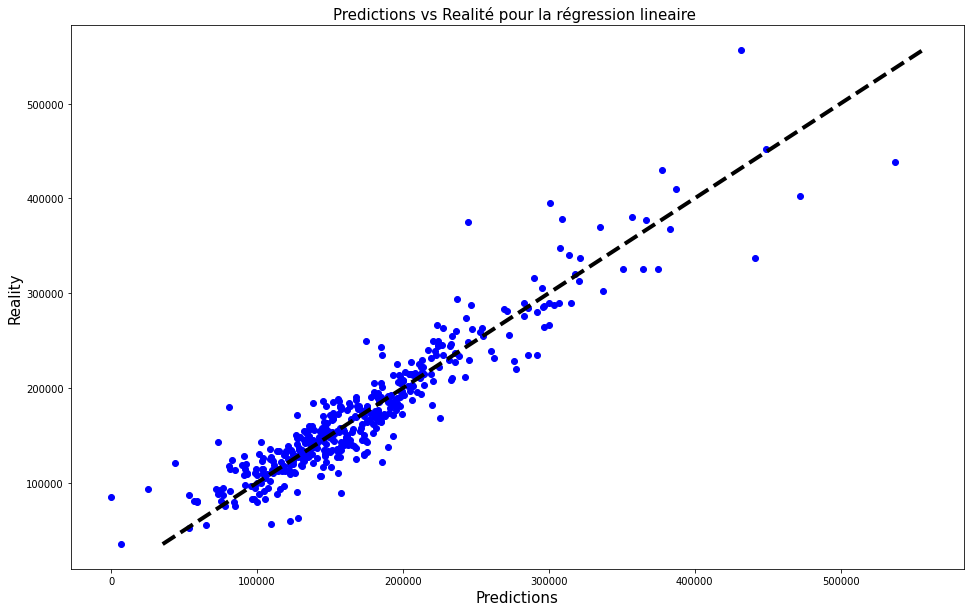

In [ ]:
# représentation graphique des données prédites VS les vraies données
fig, ax = plt.subplots(figsize=(16, 10))

plt.style.use('ggplot')
plt.plot(y_predict, y_test, 'bo')
plt.xlabel('Predictions', fontsize = 15)
plt.ylabel('Reality', fontsize = 15)
plt.title('Predictions vs Realité pour la régression lineaire ', fontsize = 15)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

# Modèle de Deep Learning

Nous allons utiler TensorFlow pour implémenter nos modèles de Deep Learning.

Nous teston plusieurs architectures, c à d différents nombres de couches cachées, de neuronnes mais aussi d'algorithmes.

Les algorithmes suivants seront comparés:


*   Adam
*   RMSprop
*   Adamax
*   Adagrad
*   Nadam



In [ ]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

# modele Adam avec 2 couches de 514 neuronnes chacune
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='Adam', loss='mse')

# entrainement du modèle
model.fit(X_train, y_train, batch_size=32, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 2s 2ms/step - loss: 28538293713.4545
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 5117288758.3030
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 3813422196.3636
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 2643923436.6061
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 3097803830.3030
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 2270022171.1515
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 2516651217.4545
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 2118095740.1212
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 2294838198.3030
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 1929531469.5758
Epoch 11/1000
32/32 [==============================] - 0s 2ms/step - loss: 1988555360.9697
Epoch 1

In [ ]:
#prédiction sur le Test
y_prob=model.predict(X_test)

In [ ]:
#Coefficient de détermination
r2_score(y_prob, y_test)

0.8683104651680955

Augmentons à préset le nombre de neuronnes par couche à 1024.

In [ ]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(1024))
model2.add(tf.keras.layers.Dense(1024))
model2.add(tf.keras.layers.Dense(1))
model2.compile(optimizer='Adam', loss='mse')

model2.fit(X_train, y_train, batch_size=32, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 0s 2ms/step - loss: 23932782188.6061
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 4200716334.5455
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 2644042119.7576
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 2591103852.6061
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 1958928011.6364
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 2845098340.8485
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 2411756365.5758
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 3092723944.7273
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 3661986784.9697
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 1999874563.8788
Epoch 11/1000
32/32 [==============================] - 0s 2ms/step - loss: 2769919596.6061
Epoch 1

In [ ]:
y_prob2=model2.predict(X_test)

Nous constatons une lègère amélioration du R2 qui passe à 0.87

In [ ]:
r2_score(y_test,y_prob2)

0.8727666618153451

Testons une architecture à 4 couches cachées et 1024 neuronnes dans chacune

In [ ]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(1024))
model3.add(tf.keras.layers.Dense(1024))
model3.add(tf.keras.layers.Dense(1024))
model3.add(tf.keras.layers.Dense(1024))
model3.add(tf.keras.layers.Dense(1))
model3.compile(optimizer='Adam', loss='mse')
# This builds the model for the first time:
model3.fit(X_train, y_train, batch_size=32, epochs=500)

Epoch 1/500
32/32 [==============================] - 0s 3ms/step - loss: 15060171527.7576
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 3000646454.3030
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 4854766467.8788
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 2303419089.4545
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 2904672628.3636
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 3957845325.5758
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 3355906079.0303
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 3915363343.5152
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 1722538608.4848
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 2618765711.5152
Epoch 11/500
32/32 [==============================] - 0s 2ms/step - loss: 4094619935.0303
Epoch 12/500
32/32

In [ ]:
y_prob3=model3.predict(X_test)

Celà conduit à une très lègère augmentation du R2 qui passe de 0.87 à 0.88, cependant le temps de calcul devient plus important.

In [ ]:
r2_score(y_test,y_prob3)

0.886556743779716

Augmentons le nombre d'itérations à 1000

In [ ]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(1024))
model4.add(tf.keras.layers.Dense(1024))
model4.add(tf.keras.layers.Dense(1024))
model4.add(tf.keras.layers.Dense(1024))
model4.add(tf.keras.layers.Dense(1))
model4.compile(optimizer='Adam', loss='mse')
# This builds the model for the first time:
model4.fit(X_train, y_train, batch_size=32, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 0s 3ms/step - loss: 15971901952.0000
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: 3022639034.1818
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 3517606578.4242
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 2386020763.1515
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 2706400512.0000
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 3734656709.8182
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 2762412101.8182
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 2820047169.9394
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 2925107527.7576
Epoch 10/1000
32/32 [==============================] - 0s 3ms/step - loss: 2605275872.9697
Epoch 11/1000
32/32 [==============================] - 0s 3ms/step - loss: 2150778123.6364
Epoch 1

In [ ]:
y_prob4=model4.predict(X_test)

Ce modèle ( bien qu'il ait 2 fois plus d'itérations) conduit à une baisse du R2 

In [ ]:
r2_score(y_prob4,y_test)

0.850155641308512

Passons à présent à l'algorithme RMSprop

In [ ]:
model_RMSprop = tf.keras.Sequential()
model_RMSprop.add(tf.keras.layers.Dense(250))
model_RMSprop.add(tf.keras.layers.Dense(250))
model_RMSprop.add(tf.keras.layers.Dense(250))
model_RMSprop.add(tf.keras.layers.Dense(250))
model_RMSprop.add(tf.keras.layers.Dense(250))
model_RMSprop.add(tf.keras.layers.Dense(250))
model_RMSprop.add(tf.keras.layers.Dense(250))
model_RMSprop.add(tf.keras.layers.Dense(250))
model_RMSprop.add(tf.keras.layers.Dense(250))
model_RMSprop.add(tf.keras.layers.Dense(250))
model_RMSprop.add(tf.keras.layers.Dense(1))
model_RMSprop.compile(optimizer='RMSprop', loss='mse')

model_RMSprop.fit(X_train, y_train, batch_size=32, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 1s 3ms/step - loss: 41666343036.1212
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: 10736635469.5758
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 14721552197.8182
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 10432512201.6970
Epoch 5/1000
32/32 [==============================] - 0s 4ms/step - loss: 13007037626.1818
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 7321271676.1212
Epoch 7/1000
32/32 [==============================] - 0s 3ms/step - loss: 13075980396.6061
Epoch 8/1000
32/32 [==============================] - 0s 4ms/step - loss: 14921630999.2727
Epoch 9/1000
32/32 [==============================] - 0s 3ms/step - loss: 5982257322.6667
Epoch 10/1000
32/32 [==============================] - 0s 3ms/step - loss: 9366033759.0303
Epoch 11/1000
32/32 [==============================] - 0s 3ms/step - loss: 6440881245.0909
E

In [ ]:
y_prob5=model_RMSprop.predict(X_test)

In [ ]:
r2_score(y_prob5,y_test)

0.5224543237248571

Testons l'algorithme Adam avec 10 couches cachées et 250 neuronnes par couche

In [ ]:

model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.Dense(250))
model6.add(tf.keras.layers.Dense(250))
model6.add(tf.keras.layers.Dense(250))
model6.add(tf.keras.layers.Dense(250))
model6.add(tf.keras.layers.Dense(250))
model6.add(tf.keras.layers.Dense(250))
model6.add(tf.keras.layers.Dense(250))
model6.add(tf.keras.layers.Dense(250))
model6.add(tf.keras.layers.Dense(250))
model6.add(tf.keras.layers.Dense(250))
model6.add(tf.keras.layers.Dense(1))
model6.compile(optimizer='Adam', loss='mse')
# This builds the model for the first time:
model6.fit(X_train, y_train, batch_size=32, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 1s 2ms/step - loss: 16080567947.6364
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 3194337908.3636
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 2034353392.4848
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 3539344826.1818
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 3197436167.7576
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 2243314319.5152
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 4419311049.6970
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 4297623598.5455
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 3956337404.1212
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 2306322680.2424
Epoch 11/1000
32/32 [==============================] - 0s 2ms/step - loss: 2496496457.6970
Epoch 1

In [ ]:
y_prob6=model6.predict(X_test)

In [ ]:
r2_score(y_prob6,y_test)

0.8305785991256881

Nous constatons que les algorithmes Adam et RMSprop donnent pratiquement les mêmes prformaces

Testons maintenant l'algorithme Adamax

In [ ]:
model_Adamax = tf.keras.Sequential()
model_Adamax.add(tf.keras.layers.Dense(1024))
model_Adamax.add(tf.keras.layers.Dense(1024))
model_Adamax.add(tf.keras.layers.Dense(1))
model_Adamax.compile(optimizer='Adamax', loss='mse')

model_Adamax.fit(X_train, y_train, batch_size=32, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 0s 2ms/step - loss: 24765101024.9697
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 4102487963.1515
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 3645258527.0303
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 2953004458.6667
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 2906536261.8182
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 2669396580.8485
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 2688190770.4242
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 2262145179.1515
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 2641398784.0000
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 2460309942.3030
Epoch 11/1000
32/32 [==============================] - 0s 2ms/step - loss: 2218691203.8788
Epoch 1

In [ ]:
y_prob2_1=model_Adamax.predict(X_test)

In [ ]:
r2_score(y_prob2_1,y_test)

0.8665148995192379

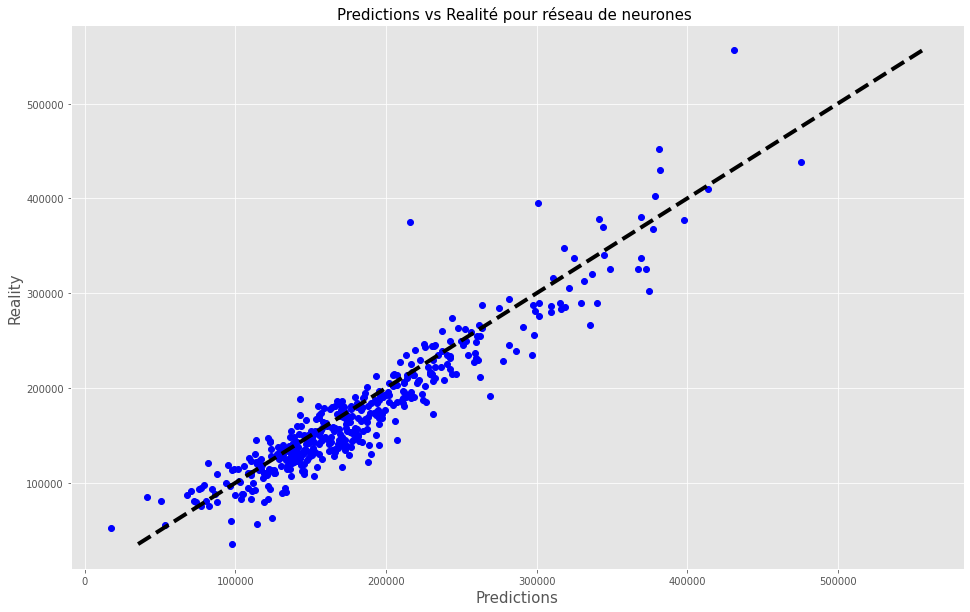

In [ ]:
#Plot des des résultats pour un modèle Deep Learning (algorithme Adamax)
fig, ax = plt.subplots(figsize=(16, 10))

plt.style.use('ggplot')
plt.plot(y_prob2_1, y_test, 'bo')
plt.xlabel('Predictions', fontsize = 15)
plt.ylabel('Reality', fontsize = 15)
plt.title('Predictions vs Realité pour réseau de neurones ', fontsize = 15)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

Test de l'algorithme Nadam

In [ ]:
model_Nadam = tf.keras.Sequential()
model_Nadam.add(tf.keras.layers.Dense(1024))
model_Nadam.add(tf.keras.layers.Dense(1024))
model_Nadam.add(tf.keras.layers.Dense(1))
model_Nadam.compile(optimizer='Nadam', loss='mse')

model_Nadam.fit(X_train, y_train, batch_size=32, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 1s 3ms/step - loss: 22151716181.3333
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: 3488718336.0000
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 2832420553.6970
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 3585490641.4545
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 1974555845.8182
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 1974163704.2424
Epoch 7/1000
32/32 [==============================] - 0s 3ms/step - loss: 3434323964.1212
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 2031543943.7576
Epoch 9/1000
32/32 [==============================] - 0s 3ms/step - loss: 2197422882.9091
Epoch 10/1000
32/32 [==============================] - 0s 3ms/step - loss: 1773087945.6970
Epoch 11/1000
32/32 [==============================] - 0s 3ms/step - loss: 2762723258.1818
Epoch 1

In [ ]:
y_prob2_2=model_Nadam.predict(X_test)

In [ ]:
r2_score(y_prob2_2,y_test)

0.8675637793600576

Test de l'agorithme Adagrad

In [ ]:
model_Adagrad = tf.keras.Sequential()
model_Adagrad.add(tf.keras.layers.Dense(1024))
model_Adagrad.add(tf.keras.layers.Dense(1024))
model_Adagrad.add(tf.keras.layers.Dense(1))
model_Adagrad.compile(optimizer='Adagrad', loss='mse')

model_Adagrad.fit(X_train, y_train, batch_size=32, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 0s 2ms/step - loss: 29785555874.9091
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 6996821379.8788
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 4138840382.0606
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 4942868673.9394
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 3709905291.6364
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 4056792521.6970
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 3364911840.9697
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 4201023891.3939
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 3927826750.0606
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 3316564107.6364
Epoch 11/1000
32/32 [==============================] - 0s 2ms/step - loss: 3785695697.4545
Epoch 1

In [ ]:
y_prob2_3=model_Adagrad.predict(X_test)

C'est le l'agorithme le moins performant

In [ ]:
r2_score(y_test,y_prob2_3)

0.7674845484796342

#Comparaison des modèles et conclusion
Nous avons tester différents modèles dans le butde prédire les prix de maisons à partir de plusieurs features donnés.

Ces modèles ont donné les performance suivantes:


*  Regression linéaire:          R2= 0.86
*  Deep Learning Adagrad:         R2=0.76
*  Deep Learning Nadam:           R2=0.85
*  Deep Learning Adamax:          R2=0.87
*  Deep Learning RMSprop:         R2=0.86
*  Deep Learning Adam:            R2=0.88




Au vu des résultats, le modèle de régression linéaire nous semble être un choix pertient pour ce problème, car il a donné à peu près les mêmes performances que les modèles de Deep Learning (voire mieux des fois),en revanche, il est beaucoup plus simple à interpréter et plus léger à faire tourner.